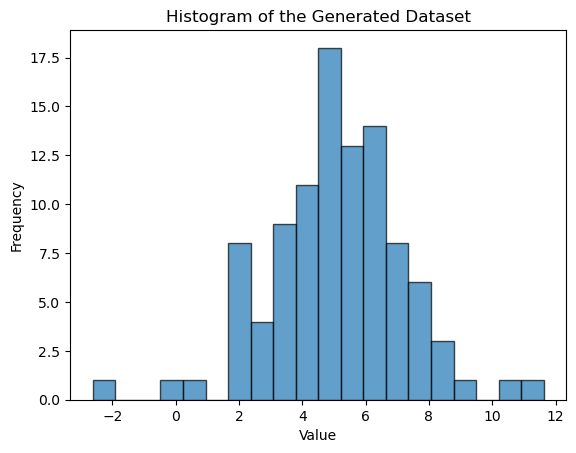

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(50)

# Parameters for the true distribution
true_mu = 5
true_sigma = 2

# Generate the dataset
data = np.random.normal(loc=true_mu, scale=true_sigma, size=100)

# Plot the histogram of the dataset
plt.hist(data, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of the Generated Dataset')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Prior parameters
mu_0 = 0  # Prior mean
lambda_0 = 1  # Prior strength
alpha_0 = 1  # Prior shape
beta_0 = 1  # Prior scale

# Calculate sufficient statistics from the data
n = len(data)
sample_mean = np.mean(data)
sample_var = np.var(data, ddof=1)

# Update the posterior parameters
lambda_n = lambda_0 + n
mu_n = (lambda_0 * mu_0 + n * sample_mean) / lambda_n
alpha_n = alpha_0 + n / 2
beta_n = beta_0 + 0.5 * (n * sample_var + lambda_0 * n * (sample_mean - mu_0)**2 / lambda_n)

# Posterior parameters
posterior_params = {
    'mu_n': mu_n,
    'lambda_n': lambda_n,
    'alpha_n': alpha_n,
    'beta_n': beta_n
}

posterior_params


{'mu_n': 5.029784472715091,
 'lambda_n': 101,
 'alpha_n': 51.0,
 'beta_n': 247.7908260753556}

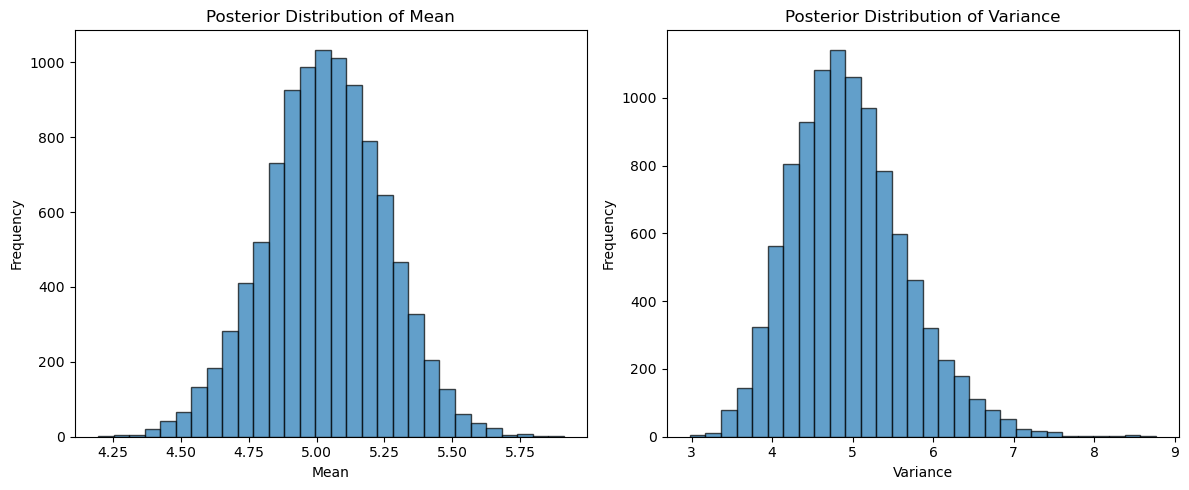

(5.031933113557259, 4.9560246050014785)

In [11]:
# Sample from the posterior distribution
num_samples = 10000
posterior_samples = []

for _ in range(num_samples):
    sigma2_sample = 1 / np.random.gamma(posterior_params['alpha_n'], 1 / posterior_params['beta_n'])
    mu_sample = np.random.normal(posterior_params['mu_n'], np.sqrt(sigma2_sample / posterior_params['lambda_n']))
    posterior_samples.append((mu_sample, sigma2_sample))

# Convert to numpy array for easier analysis
posterior_samples = np.array(posterior_samples)

# Extract the samples for mean and variance
mu_samples = posterior_samples[:, 0]
sigma2_samples = posterior_samples[:, 1]

# Plot the posterior distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(mu_samples, bins=30, edgecolor='k', alpha=0.7)
ax[0].set_title('Posterior Distribution of Mean')
ax[0].set_xlabel('Mean')
ax[0].set_ylabel('Frequency')

ax[1].hist(sigma2_samples, bins=30, edgecolor='k', alpha=0.7)
ax[1].set_title('Posterior Distribution of Variance')
ax[1].set_xlabel('Variance')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate posterior means
posterior_mean_mu = np.mean(mu_samples)
posterior_mean_sigma2 = np.mean(sigma2_samples)

posterior_mean_mu, posterior_mean_sigma2


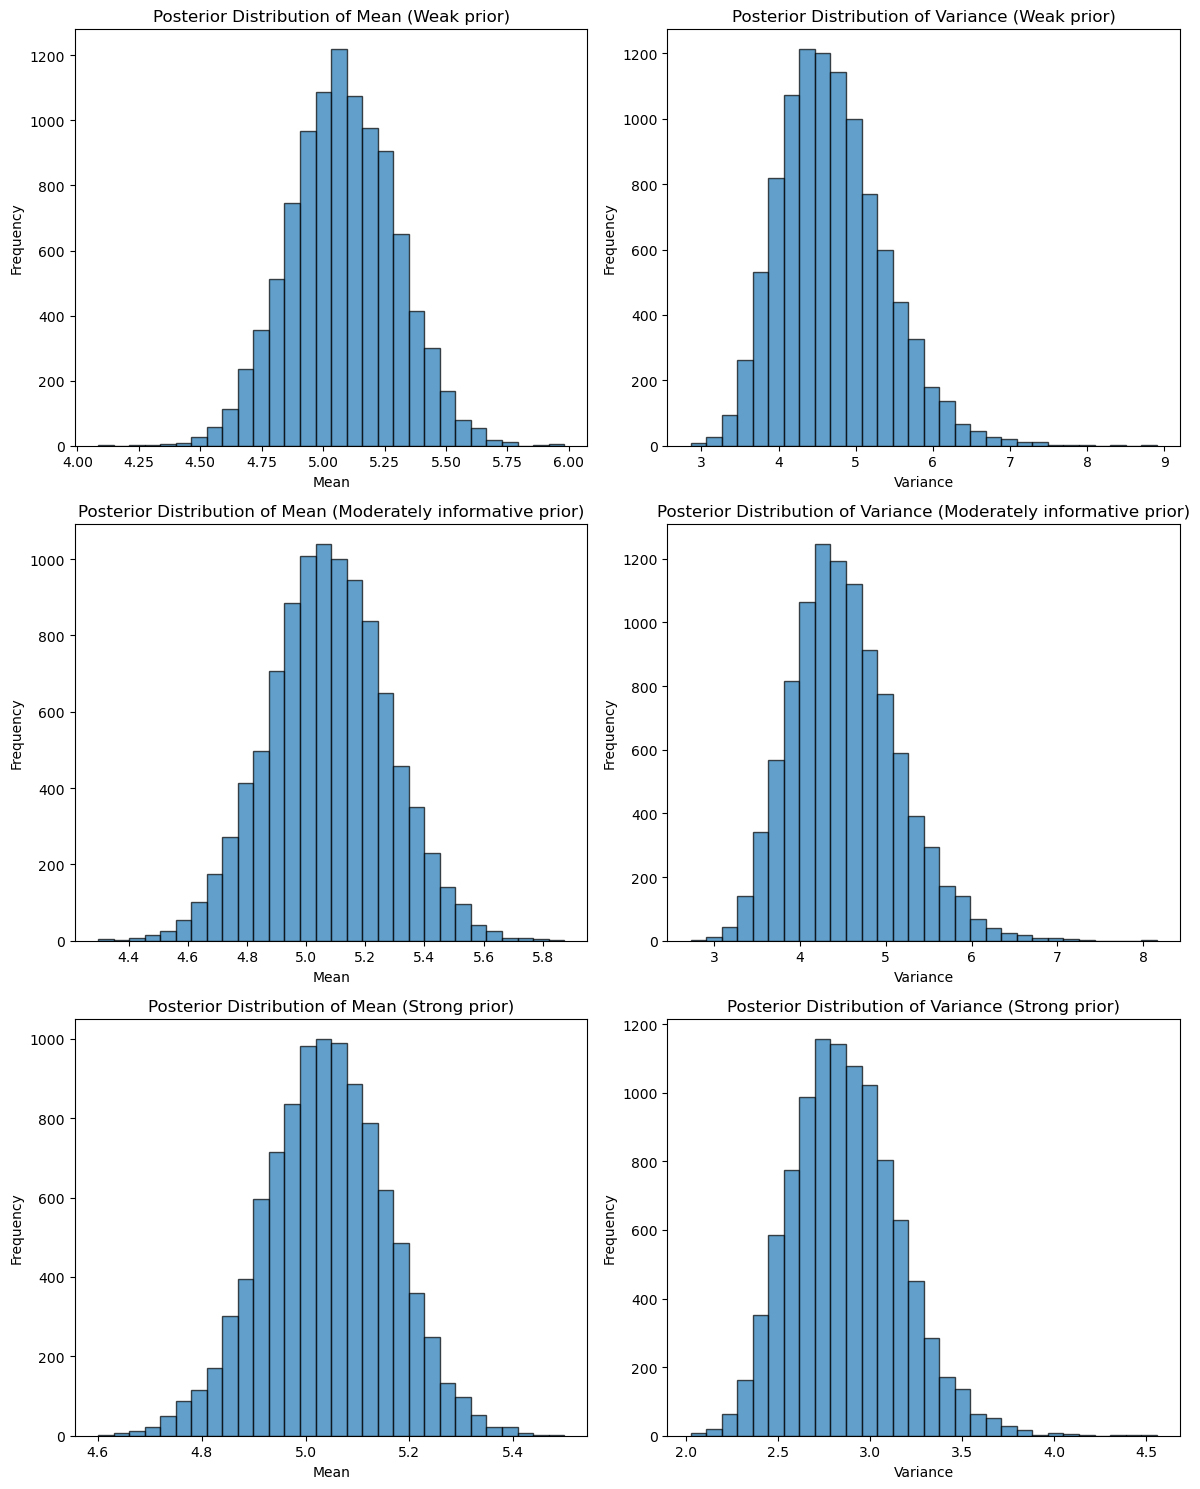

In [12]:
# Function to calculate posterior parameters and sample from the posterior distribution
def calculate_posterior(data, mu_0, lambda_0, alpha_0, beta_0):
    n = len(data)
    sample_mean = np.mean(data)
    sample_var = np.var(data, ddof=1)
    
    lambda_n = lambda_0 + n
    mu_n = (lambda_0 * mu_0 + n * sample_mean) / lambda_n
    alpha_n = alpha_0 + n / 2
    beta_n = beta_0 + 0.5 * (n * sample_var + lambda_0 * n * (sample_mean - mu_0)**2 / lambda_n)
    
    num_samples = 10000
    posterior_samples = []

    for _ in range(num_samples):
        sigma2_sample = 1 / np.random.gamma(alpha_n, 1 / beta_n)
        mu_sample = np.random.normal(mu_n, np.sqrt(sigma2_sample / lambda_n))
        posterior_samples.append((mu_sample, sigma2_sample))

    return np.array(posterior_samples)

# Priors
priors = {
    'Weak prior': {'mu_0': 0, 'lambda_0': 0.01, 'alpha_0': 1, 'beta_0': 1},
    'Moderately informative prior': {'mu_0': 5, 'lambda_0': 10, 'alpha_0': 5, 'beta_0': 10},
    'Strong prior': {'mu_0': 5, 'lambda_0': 100, 'alpha_0': 50, 'beta_0': 50}
}

# Calculate posterior samples for each prior
posterior_samples = {name: calculate_posterior(data, **params) for name, params in priors.items()}

# Plot posterior distributions for mean and variance
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

for i, (name, samples) in enumerate(posterior_samples.items()):
    mu_samples = samples[:, 0]
    sigma2_samples = samples[:, 1]

    ax[i, 0].hist(mu_samples, bins=30, edgecolor='k', alpha=0.7)
    ax[i, 0].set_title(f'Posterior Distribution of Mean ({name})')
    ax[i, 0].set_xlabel('Mean')
    ax[i, 0].set_ylabel('Frequency')

    ax[i, 1].hist(sigma2_samples, bins=30, edgecolor='k', alpha=0.7)
    ax[i, 1].set_title(f'Posterior Distribution of Variance ({name})')
    ax[i, 1].set_xlabel('Variance')
    ax[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
